K Means Clustering

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge#Here we set up the the standard scaler to the X_train data using fit()
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

number_of_cluters = 50

In [13]:
df = pd.read_csv('../data/2019_zip_data/prepped_zip_data_2019.csv', na_values=".")

In [14]:
df

,Unnamed: 0,Unnamed: 0_x,zip,total_population,log_total_population,population_density,total_workers,land_area,sqrt_land_area,aggregate_num_vehicles,...,average_commute_time_per_worker_other_means,households_with_0_vehicle,households_with_1_vehicle,households_with_2_vehicle,households_with_3_vehicle,households_with_4_vehicle,households_with_5_or_more_vehicle,Unnamed: 0_y,cbp_total_employees,cbp_total_establishments
0,0,0,601,17113,9.747594,1.026823e-04,3615,166659747,12909.676487,3115.0,...,NaN,141,1105,1527,473,281,88,NaN,NaN,NaN
1,1,1,602,37751,10.538767,4.760077e-04,11048,79307534,8905.477752,8645.0,...,NaN,527,2866,4167,1935,1126,427,NaN,NaN,NaN
2,2,2,603,47081,10.759625,5.749495e-04,11535,81887188,9049.153994,10460.0,...,NaN,462,3246,4731,2333,415,348,NaN,NaN,NaN
3,3,3,606,6392,8.762802,5.833182e-05,1238,109579993,10468.046284,1085.0,...,NaN,24,490,436,220,21,47,NaN,NaN,NaN
4,4,4,610,26686,10.191894,2.869048e-04,8201,93013428,9644.346945,6800.0,...,NaN,242,1855,3364,1848,811,81,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33115,33115,33115,99923,14,2.639057,3.320500e-07,14,42162326,6493.252344,NaN,...,NaN,0,0,14,0,0,0,35122.0,10.0,6.0
33116,33116,33116,99925,908,6.811244,6.302447e-06,372,144071036,12002.959468,235.0,...,10.882353,20,102,101,73,48,28,35123.0,229.0,27.0
33117,33117,33117,99926,1654,7.410952,4.808914e-06,536,343944587,18545.743096,350.0,...,NaN,49,117,246,97,14,13,35124.0,97.0,12.0
33118,33118,33118,99927,0,-inf,0.000000e+00,0,589690080,24283.535163,NaN,...,NaN,0,0,0,0,0,0,NaN,NaN,NaN


In [15]:
# Clean Data
# zip is not included beacuse that's an index, not a calculated value
df = df[['vehicles_per_worker',
         'total_population',
         'average_commute_time_per_worker_drive_alone',
         'pct_unemployed',
         'sqrt_land_area',
         'cbp_total_employees',
         'cbp_total_establishments',
         'pct_all_public_tspt_wrkr_cmute','pct_walked_wrkr_cmute']]

In [16]:
np.any(np.isnan(df))

True

In [17]:
np.all(np.isfinite(df))


False

In [18]:
df=df.dropna()
# df.pct_walking_and_public_transit = df.pct_all_public_tspt_wrkr_cmute + df.pct_walked_wrkr_cmute
# df.pct_walking_and_public_transit
# df
df['pct_walking_and_public_transit'] = df['pct_all_public_tspt_wrkr_cmute'] + df['pct_walked_wrkr_cmute']
df

,vehicles_per_worker,total_population,average_commute_time_per_worker_drive_alone,pct_unemployed,sqrt_land_area,cbp_total_employees,cbp_total_establishments,pct_all_public_tspt_wrkr_cmute,pct_walked_wrkr_cmute,pct_walking_and_public_transit
131,0.896627,17312,20.059524,3.930800,5458.652581,9559.0,473.0,0.009311,0.006892,0.016203
134,0.796604,5128,36.923722,2.889577,10706.931867,1060.0,91.0,0.000000,0.000000,0.000000
137,1.005155,261,22.886598,10.599078,1450.638135,131.0,16.0,0.000000,0.000000,0.000000
141,0.878192,22733,18.913516,5.796095,3819.444069,5342.0,313.0,0.015539,0.024587,0.040126
142,0.911773,30108,18.681361,5.727370,5695.586274,8998.0,545.0,0.009800,0.012930,0.022730
...,...,...,...,...,...,...,...,...,...,...
33082,0.280899,214,6.500000,9.259259,7929.561779,14.0,4.0,0.000000,0.287356,0.287356
33101,0.540541,808,6.489899,15.384615,4347.999080,104.0,26.0,0.070122,0.234756,0.304878
33105,0.692838,8640,8.957101,4.968179,64676.503840,3010.0,365.0,0.012138,0.162733,0.174871
33109,0.738580,13822,13.516856,5.905616,111465.996941,4559.0,606.0,0.039366,0.078154,0.117520


In [19]:
df

,vehicles_per_worker,total_population,average_commute_time_per_worker_drive_alone,pct_unemployed,sqrt_land_area,cbp_total_employees,cbp_total_establishments,pct_all_public_tspt_wrkr_cmute,pct_walked_wrkr_cmute,pct_walking_and_public_transit
131,0.896627,17312,20.059524,3.930800,5458.652581,9559.0,473.0,0.009311,0.006892,0.016203
134,0.796604,5128,36.923722,2.889577,10706.931867,1060.0,91.0,0.000000,0.000000,0.000000
137,1.005155,261,22.886598,10.599078,1450.638135,131.0,16.0,0.000000,0.000000,0.000000
141,0.878192,22733,18.913516,5.796095,3819.444069,5342.0,313.0,0.015539,0.024587,0.040126
142,0.911773,30108,18.681361,5.727370,5695.586274,8998.0,545.0,0.009800,0.012930,0.022730
...,...,...,...,...,...,...,...,...,...,...
33082,0.280899,214,6.500000,9.259259,7929.561779,14.0,4.0,0.000000,0.287356,0.287356
33101,0.540541,808,6.489899,15.384615,4347.999080,104.0,26.0,0.070122,0.234756,0.304878
33105,0.692838,8640,8.957101,4.968179,64676.503840,3010.0,365.0,0.012138,0.162733,0.174871
33109,0.738580,13822,13.516856,5.905616,111465.996941,4559.0,606.0,0.039366,0.078154,0.117520


In [20]:
df =df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]

df

,vehicles_per_worker,total_population,average_commute_time_per_worker_drive_alone,pct_unemployed,sqrt_land_area,cbp_total_employees,cbp_total_establishments,pct_all_public_tspt_wrkr_cmute,pct_walked_wrkr_cmute,pct_walking_and_public_transit
131,0.896627,17312,20.059524,3.930800,5458.652581,9559.0,473.0,0.009311,0.006892,0.016203
134,0.796604,5128,36.923722,2.889577,10706.931867,1060.0,91.0,0.000000,0.000000,0.000000
137,1.005155,261,22.886598,10.599078,1450.638135,131.0,16.0,0.000000,0.000000,0.000000
141,0.878192,22733,18.913516,5.796095,3819.444069,5342.0,313.0,0.015539,0.024587,0.040126
142,0.911773,30108,18.681361,5.727370,5695.586274,8998.0,545.0,0.009800,0.012930,0.022730
...,...,...,...,...,...,...,...,...,...,...
33082,0.280899,214,6.500000,9.259259,7929.561779,14.0,4.0,0.000000,0.287356,0.287356
33101,0.540541,808,6.489899,15.384615,4347.999080,104.0,26.0,0.070122,0.234756,0.304878
33105,0.692838,8640,8.957101,4.968179,64676.503840,3010.0,365.0,0.012138,0.162733,0.174871
33109,0.738580,13822,13.516856,5.905616,111465.996941,4559.0,606.0,0.039366,0.078154,0.117520


In [21]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=number_of_cluters, n_init=20) # default is 10

y_kmeans = kmeans.fit_predict(df)
df['cluster'] = kmeans.labels_

# df = df.groupby('quality').mean() #cluster means
df = df.groupby('cluster').mean() #cluster means
# df.groupby('cluster').groups
df = df.sort_values(by=['pct_walking_and_public_transit'], ascending=False)
df

C:\Users\cjong\AppData\Local\Temp\ipykernel_23780\3684634308.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.labels_


,vehicles_per_worker,total_population,average_commute_time_per_worker_drive_alone,pct_unemployed,sqrt_land_area,cbp_total_employees,cbp_total_establishments,pct_all_public_tspt_wrkr_cmute,pct_walked_wrkr_cmute,pct_walking_and_public_transit
cluster,,,,,,,,,,
27,0.047837,35038.333333,39.158532,3.793355,1154.072257,161153.333333,5591.333333,0.462491,0.396080,0.858571
6,0.426836,20412.421053,29.416592,4.965980,2185.362437,75153.578947,2419.157895,0.205831,0.269830,0.475661
16,0.470405,45450.909091,29.828016,4.345845,3706.267327,91235.090909,3376.181818,0.232168,0.185954,0.418121
48,0.533549,96128.062500,33.546438,5.393369,6067.302486,30220.500000,2116.125000,0.299241,0.066487,0.365728
3,0.566457,83030.808511,32.142197,7.028950,5497.095743,15086.638298,1265.000000,0.291700,0.042828,0.334528
36,0.576455,105831.153846,34.192044,6.351225,5138.379324,12616.769231,1109.230769,0.292573,0.035952,0.328525
43,0.638976,72073.875000,29.130096,4.782820,6080.479532,32031.062500,1930.031250,0.195015,0.047567,0.242583
47,0.675643,12799.857143,22.854303,5.718171,3096.576302,24974.523810,1066.873016,0.104477,0.112116,0.216593
29,0.680704,68738.772277,31.349604,6.988497,5234.033283,10580.653465,960.059406,0.181274,0.029250,0.210524


<AxesSubplot:ylabel='cluster'>

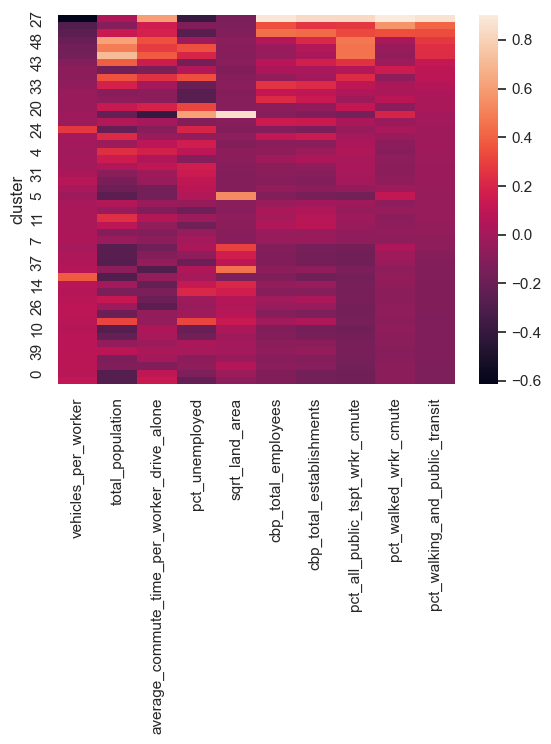

In [22]:
df_norm = (df - df.mean()) / (df.max() - df.min())
sns.heatmap(df_norm)

todo: conduct calculations in relative terms ie percentges

### REPEAT, BUT NOW WITH POPULATION DENSITY PER LAND AREA

In [23]:
df = pd.read_csv('../data/2019_zip_data/prepped_zip_data_2019.csv', na_values=".")

# Clean Data
# zip is not included beacuse that's an index, not a calculated value
df = df[['vehicles_per_worker',
         'population_density',
         'pct_unemployed',
         'sqrt_land_area',
         'cbp_total_employees',
         'cbp_total_establishments',
         'pct_all_public_tspt_wrkr_cmute','pct_walked_wrkr_cmute']]

np.any(np.isnan(df))

np.all(np.isfinite(df))

df=df.dropna()
# df.pct_walking_and_public_transit = df.pct_all_public_tspt_wrkr_cmute + df.pct_walked_wrkr_cmute
# df.pct_walking_and_public_transit
# df
df['pct_walking_and_public_transit'] = df['pct_all_public_tspt_wrkr_cmute'] + df['pct_walked_wrkr_cmute']

df =df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]


In [24]:

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=number_of_cluters, n_init=20) # default is 10

y_kmeans = kmeans.fit_predict(df)
df['cluster'] = kmeans.labels_

# df = df.groupby('quality').mean() #cluster means
df = df.groupby('cluster').mean() #cluster means
# df.groupby('cluster').groups
df = df.sort_values(by=['pct_walking_and_public_transit'], ascending=False)
df

,vehicles_per_worker,population_density,pct_unemployed,sqrt_land_area,cbp_total_employees,cbp_total_establishments,pct_all_public_tspt_wrkr_cmute,pct_walked_wrkr_cmute,pct_walking_and_public_transit
cluster,,,,,,,,,
17,0.143447,1.622560e-02,4.037776,1336.905365,156230.625000,5107.125000,0.388671,0.372913,0.761584
10,0.491394,9.262763e-03,4.182479,3615.540802,93715.833333,3021.500000,0.190413,0.209044,0.399458
14,0.433152,3.393118e-08,16.194229,155185.779287,263.000000,22.400000,0.020173,0.368001,0.388174
6,0.536377,6.595586e-03,4.644121,3787.913412,72475.285714,2338.750000,0.162882,0.198406,0.361288
43,0.683427,2.471118e-03,4.454194,4950.778295,57650.528571,2063.371429,0.098380,0.108043,0.206423
21,0.643478,6.219205e-07,7.172922,105017.555208,2710.230769,233.230769,0.026274,0.145319,0.171592
20,0.728999,2.871330e-03,4.987552,5183.764216,37319.957895,1689.436842,0.091010,0.067745,0.158754
44,0.725580,8.683391e-07,7.002396,81410.856015,1689.611111,186.666667,0.010633,0.143388,0.154021
9,0.740622,2.703349e-03,4.736099,5811.476986,46661.237113,1787.247423,0.080403,0.066522,0.146925


<AxesSubplot:ylabel='cluster'>

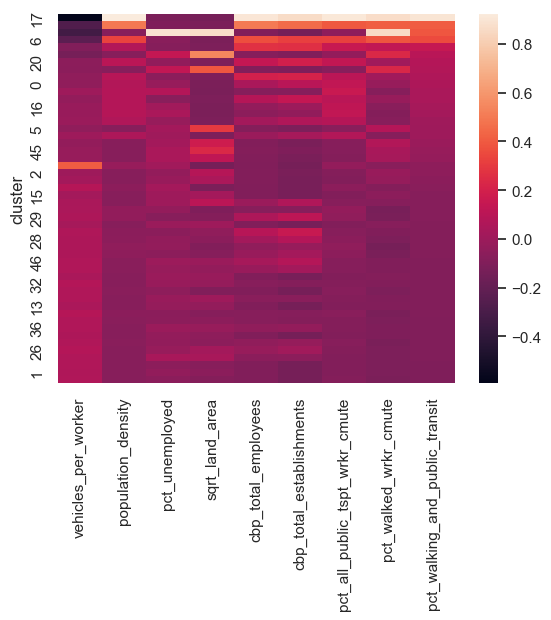

In [25]:
df_norm = (df - df.mean()) / (df.max() - df.min())
sns.heatmap(df_norm)